In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

from sklearn.cluster import KMeans

sns.set(color_codes = True)

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [2]:
dir_path = '~/Documents/DATA_SCIENCE/Kroger_Retail_Dunnhumby/The-Complete-Journey/data/'

file1= dir_path + 'transaction_data.csv'
file2 = dir_path + 'hh_demographic.csv'
file3 = dir_path + 'coupon_redempt.csv'
file4= dir_path + 'coupon.csv'
file5 = dir_path + 'campaign_desc.csv'
file6 = dir_path + 'campaign_table.csv'
file7= dir_path + 'causal_data.csv'
file8 = dir_path + 'product.csv'


In [3]:
def load_data(filename):
    df = pd.read_csv(filename)
    df.columns = df.columns.str.lower()
    return df
    

In [12]:
# import data into dataframe
df_trans = load_data(file1)
df_cus = load_data(file2)
df_coupon_redempt = load_data(file3)
df_coupon = load_data(file4)
df_camp_des = load_data(file5)
df_camp_cus = load_data(file6)
df_prod_causal = load_data(file7)
df_prod = load_data(file8)

In [13]:
# translate transaction day to datetime value from 1st of July

import datetime

df_trans.loc[df_trans.day<=184,'temp_date2'] = '2009'+ 'D' + (df_trans['day']+181).astype('string')

df_trans.loc[(df_trans.day>184) & (df_trans.day<=549),'temp_date2'] = '2010'+ 'D' + (df_trans['day']-184).astype('string')

df_trans.loc[(df_trans.day>549),'temp_date2'] = '2011'+ 'D' + (df_trans['day']-549).astype('string')

df_trans['tran_date'] = df_trans['temp_date2'].apply(lambda d: datetime.datetime.strptime(d, "%YD%j"))
df_trans

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,temp_date2,tran_date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2009D182,2009-07-01
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2009D182,2009-07-01
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2009D182,2009-07-01
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2009D182,2009-07-01
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2009D182,2009-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0,2011D162,2011-06-11
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0,2011D162,2011-06-11
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0,2011D162,2011-06-11
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0,2011D162,2011-06-11


In [14]:
df_trans = df_trans.drop(columns=['temp_date2'])
df_trans

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,tran_date
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2009-07-01
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2009-07-01
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2009-07-01
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2009-07-01
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2009-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,1598,42305362535,711,92130,1,0.99,3228,0.00,1520,102,0.0,0.0,2011-06-11
2595728,1598,42305362535,711,114102,1,8.89,3228,0.00,1520,102,0.0,0.0,2011-06-11
2595729,1598,42305362535,711,133449,1,6.99,3228,0.00,1520,102,0.0,0.0,2011-06-11
2595730,1598,42305362535,711,6923644,1,4.50,3228,-0.49,1520,102,0.0,0.0,2011-06-11


In [15]:
df_trans.dtypes

household_key                 int64
basket_id                     int64
day                           int64
product_id                    int64
quantity                      int64
sales_value                 float64
store_id                      int64
retail_disc                 float64
trans_time                    int64
week_no                       int64
coupon_disc                 float64
coupon_match_disc           float64
tran_date            datetime64[ns]
dtype: object

In [16]:
#create a dataframe contaning CustomerID and first purchase date
min_day = df_trans.groupby('household_key').tran_date.min().reset_index()
min_day.describe()

min_day.columns = ['household_key','min_tran_month']
min_day['min_tran_month'] = min_day['min_tran_month'].map(lambda date: 100*date.year + date.month)
min_day

df_trans = df_trans.merge(min_day, on='household_key')
df_trans


,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,tran_date,min_tran_month
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2009-07-01,200907
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2009-07-01,200907
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2009-07-01,200907
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2009-07-01,200907
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2009-07-01,200907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595727,2325,42097320734,697,1043730,3,13.50,427,-2.94,1157,100,0.0,0.0,2011-05-28,201105
2595728,2325,42097320734,697,1106116,1,3.69,427,0.00,1157,100,0.0,0.0,2011-05-28,201105
2595729,2325,42097320734,697,1109136,1,3.27,427,0.00,1157,100,0.0,0.0,2011-05-28,201105
2595730,2325,42097320734,697,1138854,1,3.49,427,0.00,1157,100,0.0,0.0,2011-05-28,201105


In [17]:
# calculate transaction year month
df_trans['tran_yearmonth'] = df_trans['tran_date'].map(lambda date: 100*date.year + date.month)
df_trans.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,tran_date,min_tran_month,tran_yearmonth
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2009-07-01,200907,200907
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2009-07-01,200907,200907
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2009-07-01,200907,200907
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2009-07-01,200907,200907
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2009-07-01,200907,200907


In [18]:
# monthly revenue
df_revenue = df_trans.groupby('tran_yearmonth').sales_value.sum().reset_index()
df_revenue

,tran_yearmonth,sales_value
0,200907,58180.89
1,200908,128696.47
2,200909,220809.31
3,200910,333619.15
4,200911,344344.20
5,200912,363924.99
6,201001,365510.46
7,201002,327186.20
8,201003,382529.49
9,201004,365318.36


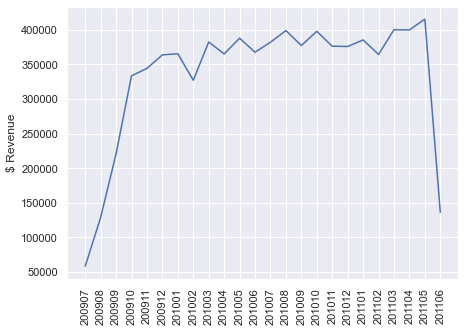

In [19]:
# graph monthly revenue
plt.figure(figsize=(7,5))
plt.plot(df_revenue.tran_yearmonth.astype('str'),df_revenue.sales_value,'b')
plt.ylabel('$ Revenue')
plt.xticks(rotation=90)
plt.show()

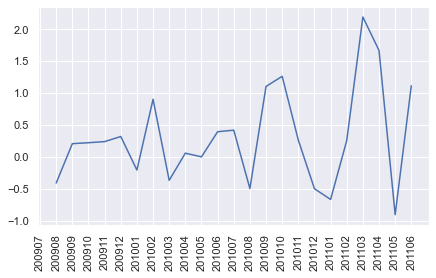

In [20]:
# monthly percentage change
plt.figure(figsize=(7,4))
df_revenue['monthly_growth'] = df_trans.sales_value.pct_change()
df_revenue

plt.plot(df_revenue.tran_yearmonth.astype('str'),df_revenue.monthly_growth,'b')
plt.xticks(rotation=90)
plt.show()

In [21]:
df_revenue

,tran_yearmonth,sales_value,monthly_growth
0,200907,58180.89,NaN
1,200908,128696.47,-0.410072
2,200909,220809.31,0.207317
3,200910,333619.15,0.222222
4,200911,344344.20,0.239669
5,200912,363924.99,0.320000
6,201001,365510.46,-0.207071
7,201002,327186.20,0.904459
8,201003,382529.49,-0.367893
9,201004,365318.36,0.058201


In [22]:
# monthly active customers
df_montly_active_cus = df_trans.groupby('tran_yearmonth')['household_key'].nunique().reset_index()
df_montly_active_cus.columns = ['tran_yearmonth','active_household']
df_montly_active_cus

,tran_yearmonth,active_household
0,200907,540
1,200908,1024
2,200909,1605
3,200910,2145
4,200911,1990
5,200912,2012
6,201001,2016
7,201002,1967
8,201003,2029
9,201004,2000


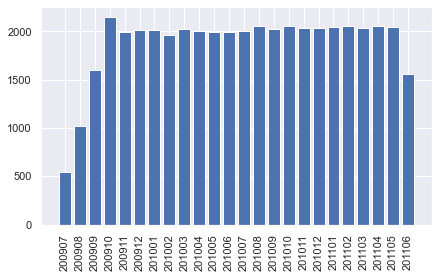

In [23]:
# graph monthly active customers
plt.figure(figsize=(7,4))
plt.bar(df_montly_active_cus.tran_yearmonth.astype('str'),df_montly_active_cus.active_household)
plt.xticks(rotation=90)
plt.show()

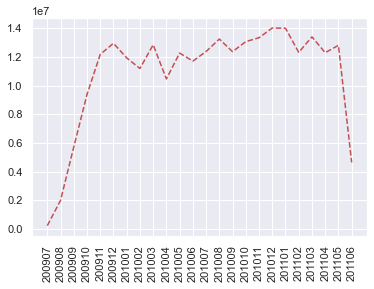

In [25]:
# graph monthly order qty
df_qty= df_trans.groupby('tran_yearmonth').quantity.sum().reset_index()
df_qty

plt.plot(df_qty.tran_yearmonth.astype('str'),df_qty.quantity,'r--')
plt.xticks(rotation=90)
plt.show()

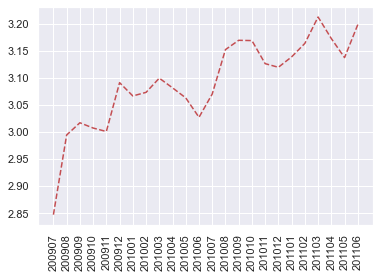

In [26]:
# graph monthly ave order value
df_ave_order = df_trans.groupby('tran_yearmonth').sales_value.mean().reset_index()
df_ave_order

plt.plot(df_ave_order.tran_yearmonth.astype('str'),df_ave_order.sales_value,'r--')
plt.xticks(rotation=90)
plt.show()

In [27]:
# identify new customer per month
df_trans['new_cus'] = 1
df_trans.loc[df_trans.tran_yearmonth > df_trans.min_tran_month,'new_cus'] = 0
df_trans.sample(10)

df_cus_revenue = df_trans.groupby(['tran_yearmonth','new_cus']).sales_value.sum().reset_index()
df_cus_revenue


,tran_yearmonth,new_cus,sales_value
0,200907,1,58180.89
1,200908,0,68943.23
2,200908,1,59753.24
3,200909,0,150128.78
4,200909,1,70680.53
5,200910,0,251293.59
6,200910,1,82325.56
7,200911,0,344240.06
8,200911,1,104.14
9,200912,0,363924.99


Total revenue from new cus     tran_yearmonth  new_cus  sales_value
0           200907        1     58180.89
2           200908        1     59753.24
4           200909        1     70680.53
6           200910        1     82325.56
8           200911        1       104.14
11          201001        1        45.94
13          201002        1        10.44
16          201004        1         6.00
22          201009        1       318.30
29          201103        1         8.00
32          201105        1       106.36
Total revenue from existing cus     tran_yearmonth  new_cus  sales_value
1           200908        0     68943.23
3           200909        0    150128.78
5           200910        0    251293.59
7           200911        0    344240.06
9           200912        0    363924.99
10          201001        0    365464.52
12          201002        0    327175.76
14          201003        0    382529.49
15          201004        0    365312.36
17          201005        0    388030.7

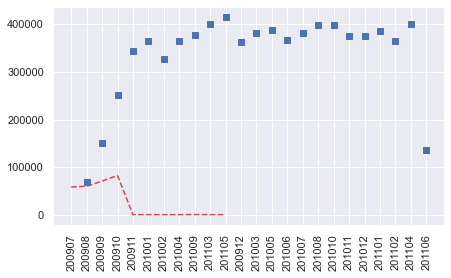

In [28]:
a = df_cus_revenue.query('new_cus==1')
b = df_cus_revenue.query('new_cus==0')

print(f'Total revenue from new cus {a}')
print(f'Total revenue from existing cus {b}')

plt.figure(figsize=(7,4))
plt.plot(a.tran_yearmonth.astype('str'),a.sales_value,'r--')
plt.plot(b.tran_yearmonth.astype('str'),b.sales_value,'bs')
plt.xticks(rotation=90)
plt.show()

In [31]:
df_montly_active_cus

,tran_yearmonth,active_household
0,200907,540
1,200908,1024
2,200909,1605
3,200910,2145
4,200911,1990
5,200912,2012
6,201001,2016
7,201002,1967
8,201003,2029
9,201004,2000


In [32]:
# retention matrix

df_user_purchase = df_trans.groupby(['household_key','tran_yearmonth'])['sales_value'].sum().reset_index()
df_user_purchase

df_retention = pd.crosstab(df_user_purchase['household_key'], df_user_purchase['tran_yearmonth']).reset_index()
df_retention.head(10)

tran_yearmonth,household_key,200907,200908,200909,200910,200911,200912,201001,201002,201003,201004,201005,201006,201007,201008,201009,201010,201011,201012,201101,201102,201103,201104,201105,201106
0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,2,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0
2,3,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1
3,4,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,0
4,5,0,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,1,0,0,1,1
5,6,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,7,1,1,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
7,8,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,9,0,0,0,1,1,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,1,1,1,0
9,10,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [33]:
df_retention.to_csv('DATA_CLEAN/monthlyRetention_per_household.csv',index=False)

In [34]:
months = df_retention.columns[1:]
re_array = []
months

for m in range(len(months)-1):
    re_data = {}
    pre_month = months[m]
    cur_month = months[m+1]
    # print(m, pre_month, cur_month)
    re_data['tran_yearmonth'] = int(cur_month)
    re_data['total_cus'] = df_retention[cur_month].sum()
    re_data['retained_cus'] = df_retention[(df_retention[cur_month]>0) & (df_retention[pre_month]>0)][cur_month].sum()
    re_array.append(re_data)

re_array

df_retention2 = pd.DataFrame(re_array)
df_retention2['retention_rate'] = df_retention2.retained_cus /  df_retention2.total_cus 
df_retention2


,tran_yearmonth,total_cus,retained_cus,retention_rate
0,200908,1024,444,0.433594
1,200909,1605,877,0.546417
2,200910,2145,1363,0.635431
3,200911,1990,1833,0.921106
4,200912,2012,1783,0.886183
5,201001,2016,1829,0.907242
6,201002,1967,1797,0.913574
7,201003,2029,1788,0.881222
8,201004,2000,1820,0.910000
9,201005,1999,1808,0.904452


In [35]:
# average retention rate
df_retention2.query('tran_yearmonth>=200909 & tran_yearmonth<=201105').retention_rate.describe()

count    21.000000
mean      0.873975
std       0.095631
min       0.546417
25%       0.896652
50%       0.902846
75%       0.909268
max       0.921106
Name: retention_rate, dtype: float64

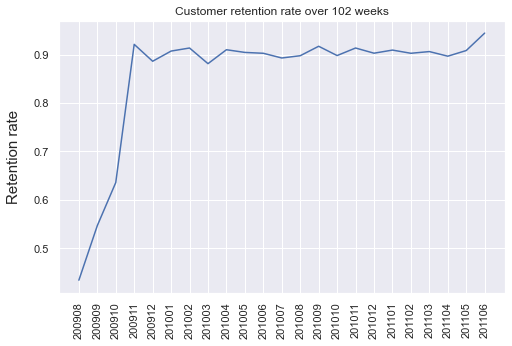

In [37]:
plt.figure(figsize=(8,5))
plt.plot(df_retention2.tran_yearmonth.astype('str'),df_retention2.retention_rate,'b')
plt.xticks(rotation=90)
plt.ylabel('Retention rate', size=15, labelpad=12.5)
plt.title('Customer retention rate over 102 weeks')
plt.show()

In [38]:
min_day

,household_key,min_tran_month
0,1,200908
1,2,200910
2,3,200910
3,4,200910
4,5,200909
...,...,...
2495,2496,200910
2496,2497,200909
2497,2498,200910
2498,2499,200909


In [39]:
arr_cus_unique = df_trans.household_key.unique()
print('Total households',len(arr_cus_unique))

arr_cus_camp = df_camp_cus.household_key.unique()
print('Households received campaigns',len(arr_cus_camp))

arr_cus_no_camp = set(arr_cus_unique)-set(arr_cus_camp)
print('Households did not receive campaigns',len(arr_cus_no_camp))

arr_cus_redempt = df_coupon_redempt.household_key.unique()
print('Households redeemed coupons',len(arr_cus_redempt))

arr_cus_no_redempt = set(arr_cus_camp)-set(arr_cus_redempt)
print('Households did not redeem',len(arr_cus_no_redempt))


Total households 2500
Households received campaigns 1584
Households did not receive campaigns 916
Households redeemed coupons 434
Households did not redeem 1150


In [40]:
# monthly active customers

temp1 = df_trans[df_trans.household_key.isin(arr_cus_redempt)]
df_monthly_active_cus1 = temp1.groupby('tran_yearmonth')['household_key'].nunique().reset_index()

df_monthly_active_cus1.rename(columns={'household_key':'household_count'},inplace=True)
df_monthly_active_cus1['ave_retention_rate'] = round(df_monthly_active_cus1.household_count / len(arr_cus_redempt),2)
df_monthly_active_cus1

m = df_monthly_active_cus1.query('tran_yearmonth>=200909 & tran_yearmonth<=201105').ave_retention_rate.mean()
b = temp1.groupby('basket_id').sales_value.sum().mean()

print('CUS REDEEMED')
print(f'Ave retention rate {round(m,3)}')
print(f'Ave basket value {round(b,3)}')


CUS REDEEMED
Ave retention rate 0.964
Ave basket value 34.255


In [41]:
temp2 = df_trans[df_trans.household_key.isin(arr_cus_no_redempt)]
df_monthly_active_cus2 = temp2.groupby('tran_yearmonth')['household_key'].nunique().reset_index()
df_monthly_active_cus2.rename(columns={'household_key':'household_count'},inplace=True)
df_monthly_active_cus2['ave_retention_rate'] = round(df_monthly_active_cus2.household_count / len(arr_cus_no_redempt),2)
df_monthly_active_cus2

m = df_monthly_active_cus2.query('tran_yearmonth>=200909 & tran_yearmonth<=201105').ave_retention_rate.mean()
b = temp2.groupby('basket_id').sales_value.sum().mean()

print('CUS DID NOT REDEEM')
print(f'Ave retention rate {round(m,3)}')
print(f'Ave basket value {round(b,3)}')

# temp2.query('coupon_disc!=0 & day >= 224 & day <=719').household_key.unique().shape
# temp2.query('coupon_disc!=0 & day >= 224 & day <=719').sample(10)
# df_trans.query('coupon_disc!=0 & day >= 224 & day <=719')

# df_monthly_active_cus2

CUS DID NOT REDEEM
Ave retention rate 0.903
Ave basket value 27.1


In [42]:
temp3 = df_trans[df_trans.household_key.isin(arr_cus_no_camp)]
df_monthly_active_cus3 = temp3.groupby('tran_yearmonth')['household_key'].nunique().reset_index()
df_monthly_active_cus3.rename(columns={'household_key':'household_count'},inplace=True)
df_monthly_active_cus3['ave_retention_rate'] = round(df_monthly_active_cus3.household_count / len(arr_cus_no_camp),2)
df_monthly_active_cus3

m = df_monthly_active_cus3.query('tran_yearmonth>=200909 & tran_yearmonth<=201105').ave_retention_rate.mean()
b = temp3.groupby('basket_id').sales_value.sum().mean()

print('CUS DID NOT RECEIVE CAMPAIGN OFFER')
print(f'Ave retention rate {round(m,3)}')
print(f'Ave basket value {round(b,3)}')

# df_monthly_active_cus3

CUS DID NOT RECEIVE CAMPAIGN OFFER
Ave retention rate 0.604
Ave basket value 26.129


In [43]:
temp4 = df_trans[df_trans.household_key.isin(arr_cus_camp)]
df_monthly_active_cus4 = temp4.groupby('tran_yearmonth')['household_key'].nunique().reset_index()
df_monthly_active_cus4.rename(columns={'household_key':'household_count'},inplace=True)
df_monthly_active_cus4['ave_retention_rate'] = round(df_monthly_active_cus4.household_count / len(arr_cus_camp),2)
df_monthly_active_cus4

m = df_monthly_active_cus4.query('tran_yearmonth>=200909 & tran_yearmonth<=201105').ave_retention_rate.mean()
b = temp3.groupby('basket_id').sales_value.sum().mean()

print('CUS RECEIVED CAMPAIGN OFFERS')
print(f'Ave retention rate {round(m,3)}')
print(f'Ave basket value {round(b,3)}')

# df_monthly_active_cus4

CUS RECEIVED CAMPAIGN OFFERS
Ave retention rate 0.92
Ave basket value 26.129


In [43]:
duringCamp18 = pd.read_csv('DATA_CLEAN/households_duringCamp18.csv')

In [44]:
duringCamp18.head()

,Unnamed: 0,household_key,revenue,recency,frequency,recency_cluster,frequency_cluster,revenue_cluster,rfm_score,segment,received_campA_18,redeemed_campA_18,GROCERY_spend,DELI_spend,PRODUCE_spend,KIOSK-GAS_spend,DRUG GM_spend,MEAT_spend
0,0,2375,466.49,3,17,3,1,1,5,Mid-value,1,1,173.75,NaN,65.80,NaN,62.36,68.50
1,1,1172,596.30,2,19,3,1,1,5,Mid-value,1,0,227.81,29.96,21.75,28.82,152.51,45.53
2,2,2483,266.46,0,15,3,1,1,5,Mid-value,1,0,147.57,2.65,35.39,NaN,40.89,17.03
3,3,2305,539.85,1,10,3,1,1,5,Mid-value,1,1,317.07,10.47,48.83,17.75,63.64,45.81
4,4,985,288.61,3,11,3,1,1,5,Mid-value,0,0,147.96,12.83,32.92,NaN,51.64,11.60


<AxesSubplot:xlabel='segment'>

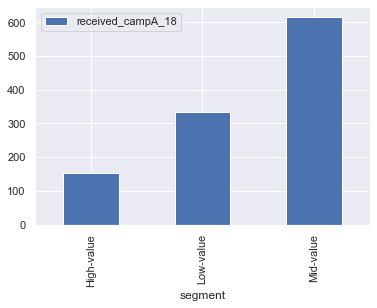

In [45]:
duringCamp18.groupby('segment').agg({'received_campA_18':'sum'}).plot.bar()

<AxesSubplot:xlabel='segment'>

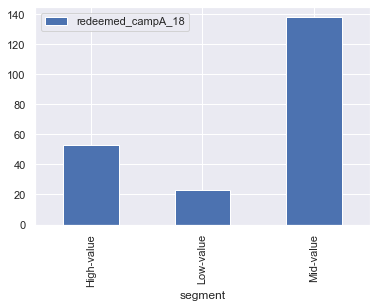

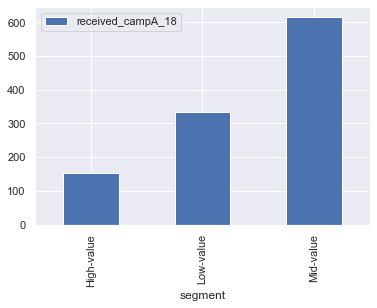

In [46]:
duringCamp18.groupby('segment').agg({'redeemed_campA_18':'sum'}).plot.bar()
duringCamp18.groupby('segment').agg({'received_campA_18':'sum'}).plot.bar()

In [47]:
d1 = duringCamp18.groupby('segment').agg({'received_campA_18':'sum'}).reset_index()
d2 = duringCamp18.groupby('segment').agg({'redeemed_campA_18':'sum'}).reset_index()

In [48]:
d1

,segment,received_campA_18
0,High-value,154
1,Low-value,335
2,Mid-value,615


In [49]:
d2

,segment,redeemed_campA_18
0,High-value,53
1,Low-value,23
2,Mid-value,138


In [50]:
d3 = d1.merge(d2, on='segment')
d3

,segment,received_campA_18,redeemed_campA_18
0,High-value,154,53
1,Low-value,335,23
2,Mid-value,615,138


In [51]:
d3['redemption_rate'] = d3.redeemed_campA_18 / d3.received_campA_18
d3

,segment,received_campA_18,redeemed_campA_18,redemption_rate
0,High-value,154,53,0.344156
1,Low-value,335,23,0.068657
2,Mid-value,615,138,0.224390


<AxesSubplot:>

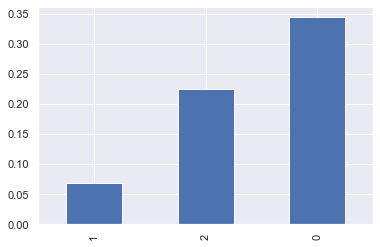

In [53]:
d3.sort_values('redemption_rate',ascending=True).redemption_rate.plot.bar()

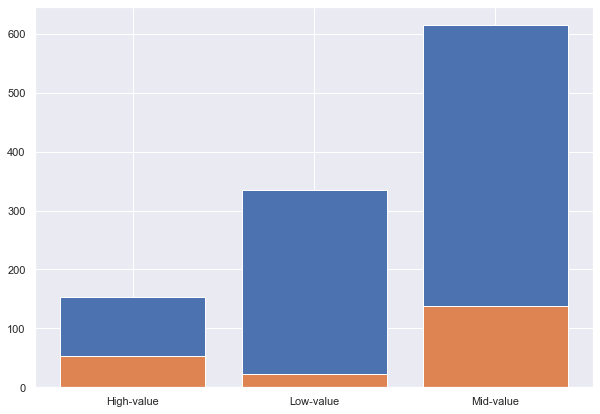

In [58]:
plt.figure(figsize=(10,7))
plt.bar(d3.segment, d3.received_campA_18)
plt.bar(d3.segment, d3.redeemed_campA_18)
plt.show()

<BarContainer object of 3 artists>

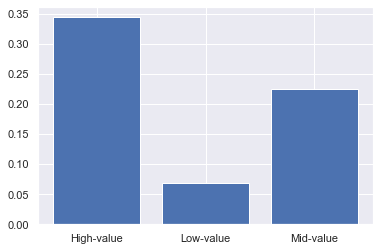

In [59]:
plt.bar(d3.segment, d3.redemption_rate)

In [60]:
d4 = duringCamp18.groupby('segment').agg({'revenue':'sum'}).reset_index()
d4

,segment,revenue
0,High-value,202319.58
1,Low-value,139680.68
2,Mid-value,409569.72
